## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [14]:
path = r'D:\WORK\Bootcamp\6\Project\Data'

In [15]:
df =pd.read_csv(os.path.join(path,'Prepared','Chocolate Bars',"Updated_Data3.csv"), index_col = False)

In [16]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company_(Maker-if known)',
       'Specific Bean Origin_or Bar Name', 'REF', 'Review_Date',
       'Cocoa_Percent', 'Company_Location', 'Rating', 'Broad Bean_Origin',
       'Latitude', 'Longitude', 'Company_Location_Count',
       'Location Rarity Classification', 'Cocoa Amount Group'],
      dtype='object')

### 2. Data cleaning

In [17]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,Company_(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Broad Bean_Origin,Latitude,Longitude,Company_Location_Count,Location Rarity Classification,Cocoa Amount Group
0,0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome,46.6,2.21,144,somewhat common,Light Amount
1,1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo,46.6,2.21,144,somewhat common,Average Amount
2,2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo,46.6,2.21,144,somewhat common,Average Amount
3,3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo,46.6,2.21,144,somewhat common,Average Amount
4,4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru,46.6,2.21,144,somewhat common,Average Amount
5,5,5,A. Morin,Carenero,1315,2014,0.70,France,2.75,Venezuela,46.6,2.21,144,somewhat common,Average Amount
6,6,6,A. Morin,Cuba,1315,2014,0.70,France,3.50,Cuba,46.6,2.21,144,somewhat common,Average Amount
7,7,7,A. Morin,Sur del Lago,1315,2014,0.70,France,3.50,Venezuela,46.6,2.21,144,somewhat common,Average Amount
8,8,8,A. Morin,Puerto Cabello,1319,2014,0.70,France,3.75,Venezuela,46.6,2.21,144,somewhat common,Average Amount
9,9,9,A. Morin,Pablino,1319,2014,0.70,France,4.00,Peru,46.6,2.21,144,somewhat common,Average Amount


In [18]:
df.shape

(1722, 15)

In [8]:
# Rename the columns in the same way as in Exercise 6.2.
# Unnessary for my data
#df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

##### Missing values

In [19]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0.1                        0
Unnamed: 0                          0
Company_(Maker-if known)            0
Specific Bean Origin_or Bar Name    0
REF                                 0
Review_Date                         0
Cocoa_Percent                       0
Company_Location                    0
Rating                              0
Broad Bean_Origin                   1
Latitude                            2
Longitude                           7
Company_Location_Count              0
Location Rarity Classification      0
Cocoa Amount Group                  0
dtype: int64

In [21]:
# remove the unnessary columns
df = df.drop(columns=['Latitude','Longitude','Unnamed: 0.1', 'Unnamed: 0'])

In [22]:
# remove the missing entry in bean origin
df = df.dropna(subset=['Broad Bean_Origin'])

##### Duplicates check

In [23]:
dups = df.duplicated()

In [24]:
dups.shape # No dups

(1721,)

##### Extreme values checks

C:\Users\Oa\AppData\Local\Temp\ipykernel_26124\4149546762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'], bins=5) # Shows extreme values


<Axes: xlabel='Rating', ylabel='Density'>

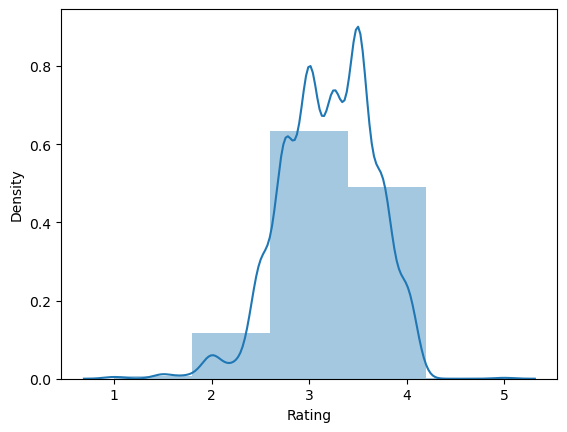

In [25]:
sns.distplot(df['Rating'], bins=5) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [26]:
df['Rating'].mean() # Check the mean

3.196106914584544

In [27]:
df['Rating'].median() # Check the median

3.25

In [28]:
df['Rating'].max() # Check the max

5.0

### 3. Data prep for regression analysis 

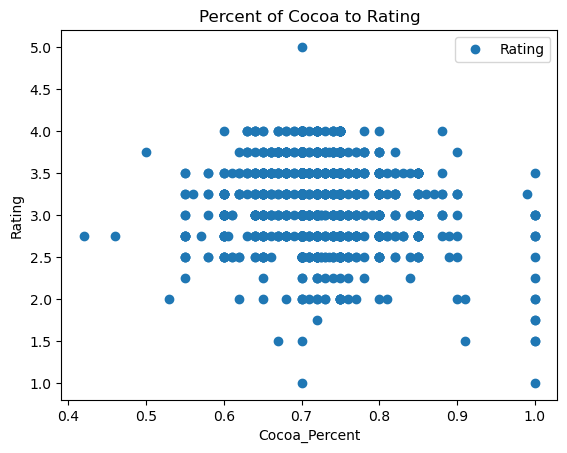

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Cocoa_Percent', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Percent of Cocoa to Rating')  
plt.xlabel('Cocoa_Percent')  
plt.ylabel('Rating')  
plt.show()

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cocoa_Percent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [31]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [32]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

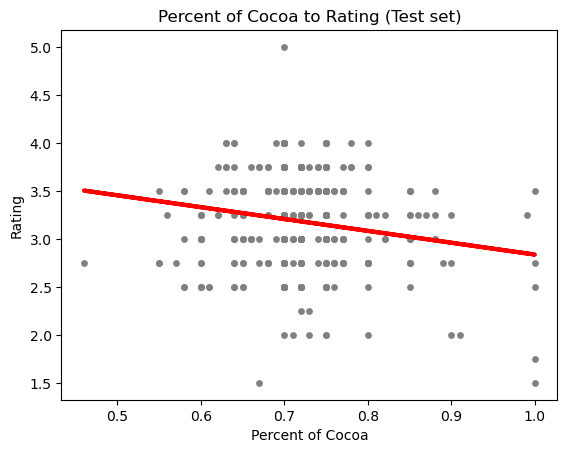

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Percent of Cocoa to Rating (Test set)')
plot_test.xlabel('Percent of Cocoa')
plot_test.ylabel('Rating')
plot_test.show()

In [39]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [40]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.23491977]]
Mean squared error:  0.21013904684868837
R2 score:  0.004749094558398004


In [41]:
y_predicted

array([[3.20739355],
       [3.18269516],
       [3.20739355],
       [3.20739355],
       [3.14564757],
       [3.28148874],
       [3.14564757],
       [3.14564757],
       [3.18269516],
       [3.18269516],
       [3.20739355],
       [3.28148874],
       [3.20739355],
       [3.20739355],
       [3.19504436],
       [3.26913954],
       [3.18269516],
       [3.20739355],
       [3.18269516],
       [3.20739355],
       [3.19504436],
       [3.20739355],
       [3.18269516],
       [3.23209195],
       [3.20739355],
       [3.18269516],
       [2.83691762],
       [3.20739355],
       [3.20739355],
       [3.20739355],
       [3.20739355],
       [3.13329837],
       [3.20739355],
       [3.20739355],
       [2.9480604 ],
       [3.18269516],
       [3.18269516],
       [3.08390158],
       [3.14564757],
       [3.20739355],
       [3.20739355],
       [3.20739355],
       [3.39263152],
       [3.20739355],
       [3.20739355],
       [3.12094917],
       [3.20739355],
       [3.120

In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.00,3.207394
1,3.25,3.182695
2,3.50,3.207394
3,3.25,3.207394
4,3.00,3.145648
5,2.50,3.281489
6,2.50,3.145648
7,2.75,3.145648
8,2.75,3.182695
9,3.00,3.182695


##### Compare how the regression fits the training set

In [43]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [44]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.23491977]]
Mean squared error:  0.20693647753401048
R2 score:  0.02572833341667846


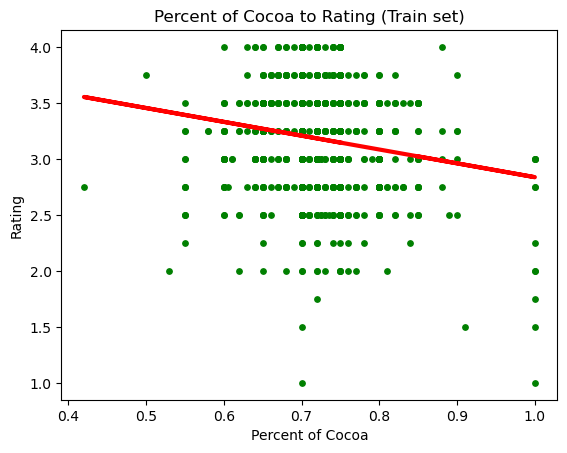

In [46]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Percent of Cocoa to Rating (Train set)')
plot_test.xlabel('Percent of Cocoa')
plot_test.ylabel('Rating')
plot_test.show()

### Bonus: performance improvement after removing outliers

# No Outliers found

In [50]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Cocoa_Percent'] <1] 

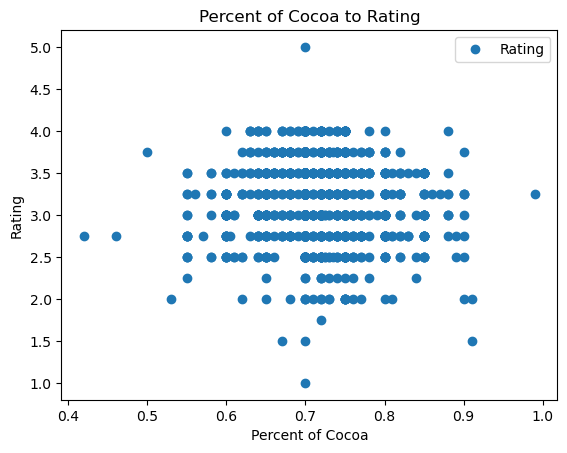

In [51]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Cocoa_Percent', y='Rating', style='o')  
plt.title('Percent of Cocoa to Rating')  
plt.xlabel('Percent of Cocoa')  
plt.ylabel('Rating')  
plt.show()

In [52]:
# Reshape again.

X_2 = df_test['Cocoa_Percent'].values.reshape(-1,1)
y_2 = df_test['Rating'].values.reshape(-1,1)

In [53]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [54]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [55]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [56]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.57713031]]
Mean squared error:  0.20397295817813144
R2 score:  -0.0031243045498317024


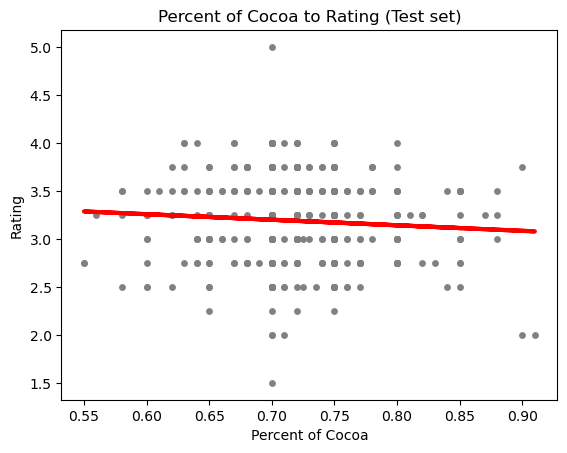

In [58]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Percent of Cocoa to Rating (Test set)')
plot_test.xlabel('Percent of Cocoa')
plot_test.ylabel('Rating')
plot_test.show()

In [59]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,3.50,3.113233
1,3.50,3.199803
2,3.25,3.170946
3,2.75,3.199803
4,2.50,3.199803
5,2.75,3.234431
6,2.75,3.124776
7,3.25,3.199803
8,3.75,3.199803
9,2.75,3.211345


# Questions and Answers
### Reflect On What I Learned
What I think this highlights is that people have different tastes, and the percentage of cocoa cannot reliably be used to predict how someone will rate chocolate. With an R score of 0.0257 on the training set, we can say with certainty that this is not a good marker for predictability.

__--__

### Reflect on Possible Bias
Tastes in chocolate are heavily influenced by regional preferences, traditions, and availability of certain types of chocolate, which can significantly vary from country to country. For example, Europeans, tend to prefer high-quality, artisan chocolates with a smooth texture and rich flavors, often with higher cocoa content. In contrast, many Americans may be more accustomed to sweeter milk chocolate, with a lower cocoa percentage, often paired with additional ingredients like caramel or nuts. This even leads them to classify chocolate differently such in the case of milk chocolate which "In the EU, milk chocolate must contain at least 30% cocoa, while it only has to contain 10% in the U.S." - milk moovement

Citation 
Milk Moovement. "Chocolate Wars: American vs. European." Milk Moovement Blog, https://blog.milkmoovement.com/news/chocolate-wars-american-vs.-european#:~:text=The%20chocolate%2Dmaking%20process%20differs,different%20standards%20for%20cocoa%20content. Accessed 13 Oct. 2024.

__--__
